# Exploration of the small-world effects

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

## Construct a small world network

For networks that has:
1. N nodes 
2. Z nearest connected neighbor
3. p probability of adding a shortcut


In [20]:
N = 20
Z = 4
p = 0

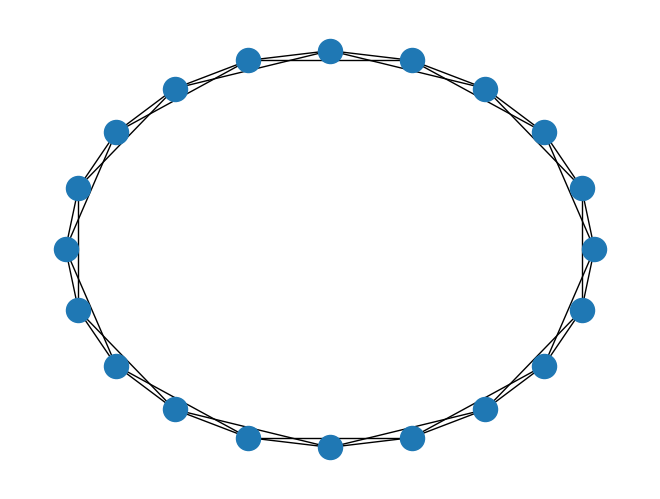

In [21]:
G = nx.newman_watts_strogatz_graph(N, Z, p)
nx.draw(G, pos=nx.circular_layout(G))
plt.draw()
plt.savefig("simple_graph.png")

## Find the path length distribution


In [22]:
avg_shortest_path = nx.average_shortest_path_length(G)

In [23]:
N = 50
Z = 2
p = np.linspace(0.001, 1, 100)

distance_distribution = []


for s in p:
    G = nx.newman_watts_strogatz_graph(N, Z, s)
    avg_shortest_path = nx.average_shortest_path_length(G)
    distance_distribution.append(avg_shortest_path)


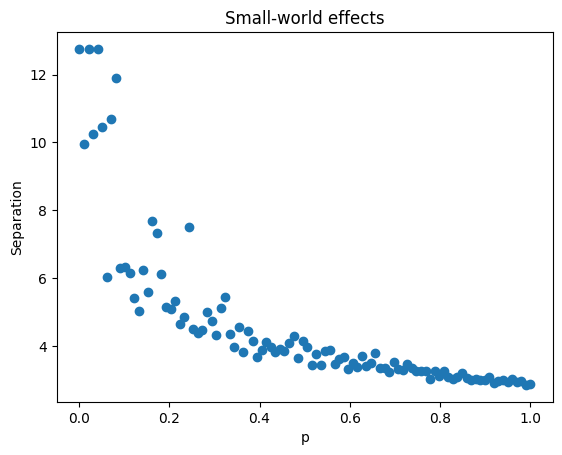

In [24]:
N = 50
Z = 2
p = np.linspace(0.001, 1, 100)

distance_distribution = []
for s in p:
    G = nx.newman_watts_strogatz_graph(N, Z, s)
    avg_shortest_path = nx.average_shortest_path_length(G)
    distance_distribution.append(avg_shortest_path)

fig,ax = plt.subplots()
ax.scatter(p, distance_distribution)
ax.set_ylabel("Separation")
ax.set_xlabel("p")
ax.set_title("Small-world effects")
plt.savefig("small_world.png")

### Comparing graphs

In [25]:
N = 50
Z = 2
p = 0.1

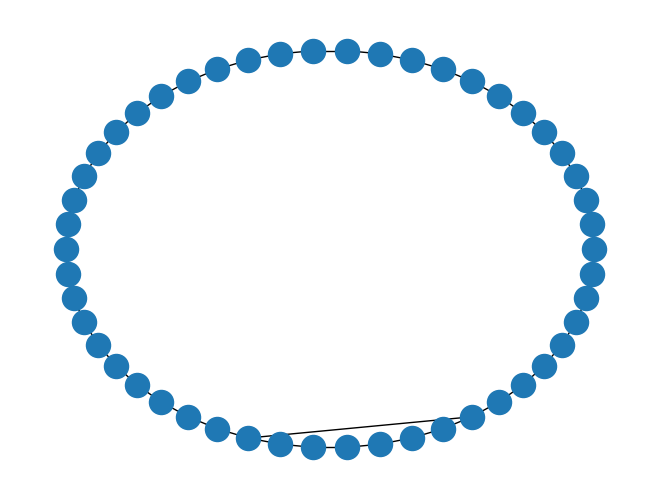

In [26]:
G = nx.newman_watts_strogatz_graph(N, Z, p)
nx.draw(G, pos=nx.circular_layout(G))
plt.draw()

In [27]:
N = 1000
Z = 10
p = 0.001

31.7046986986987


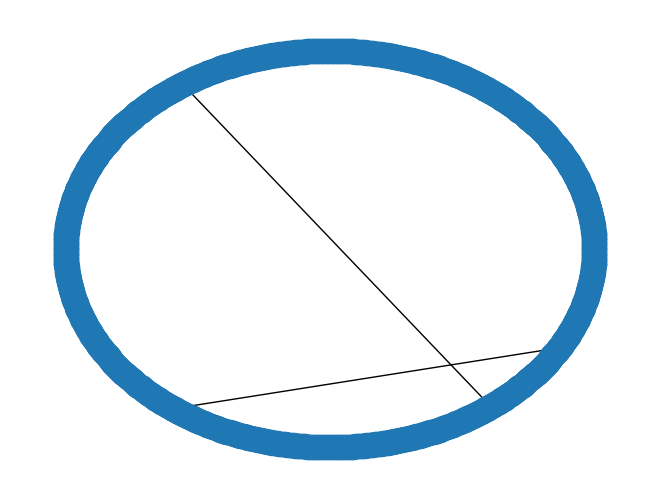

In [28]:
G = nx.newman_watts_strogatz_graph(N, Z, p)
nx.draw(G, pos=nx.circular_layout(G, scale=1))
print(nx.average_shortest_path_length(G))
plt.draw()
plt.savefig("sparse.png")

In [29]:
N = 1000
Z = 10
p = 0.1

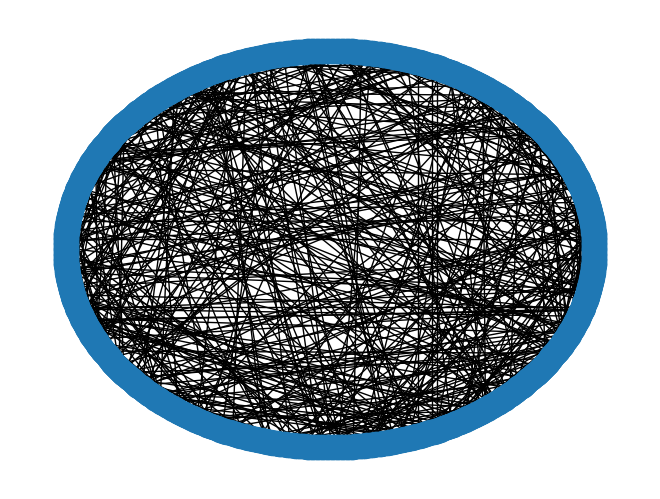

In [30]:
G = nx.newman_watts_strogatz_graph(N, Z, p)
nx.draw(G, pos=nx.circular_layout(G))
nx.average_shortest_path_length(G)
plt.draw()
plt.savefig("dense.png")

### Rescaled and plot

In [31]:
N = 100
Z = 2
p = np.linspace(0.001, 1, 100)

distance_distribution = []


for s in p:
    G = nx.newman_watts_strogatz_graph(N, Z, s)
    avg_shortest_path = nx.average_shortest_path_length(G)
    distance_distribution.append(avg_shortest_path)

rescale_distance = np.pi * np.array(distance_distribution) * Z / N
total_num_shortcuts = p * N * Z / 2


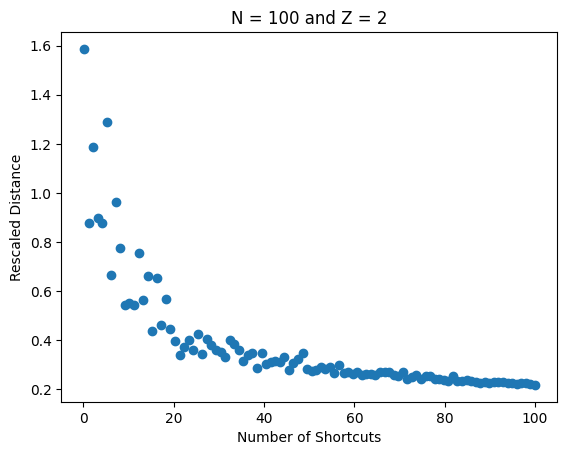

In [32]:
N = 100
Z = 2
p = np.linspace(0.001, 1, 100)

distance_distribution = []
for s in p:
    G = nx.newman_watts_strogatz_graph(N, Z, s)
    avg_shortest_path = nx.average_shortest_path_length(G)
    distance_distribution.append(avg_shortest_path)

rescale_distance = np.pi * np.array(distance_distribution) * Z / N
total_num_shortcuts = p * N * Z / 2

fig,ax = plt.subplots()
ax.scatter(total_num_shortcuts, rescale_distance)
ax.set_ylabel("Rescaled Distance")
ax.set_xlabel("Number of Shortcuts")
ax.set_title("N = 100 and Z = 2")
plt.savefig("small_world.png")

In [33]:
N = 100
Z = 4
p = np.linspace(0.001, 1, 100)

distance_distribution = []


for s in p:
    G = nx.newman_watts_strogatz_graph(N, Z, s)
    avg_shortest_path = nx.average_shortest_path_length(G)
    distance_distribution.append(avg_shortest_path)

rescale_distance = np.pi * np.array(distance_distribution) * Z / N
total_num_shortcuts = p * N * Z / 2


Text(0.5, 1.0, 'N = 100 and Z = 4')

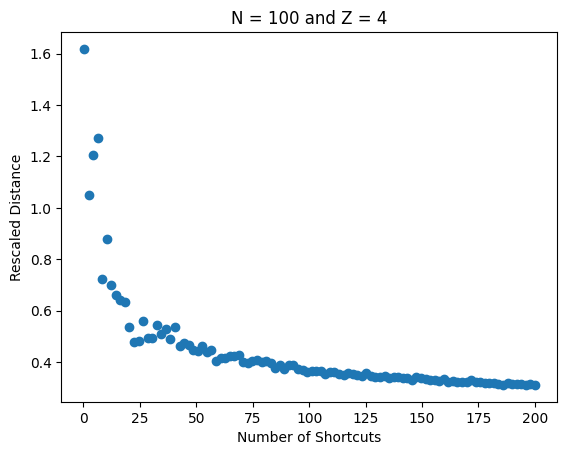

In [34]:
fig,ax = plt.subplots()
ax.scatter(total_num_shortcuts, rescale_distance)
ax.set_ylabel("Rescaled Distance")
ax.set_xlabel("Number of Shortcuts")
ax.set_title("N = 100 and Z = 4")

In [35]:
N = 200
Z = 2
p = np.linspace(0.001, 1, 100)

distance_distribution = []


for s in p:
    G = nx.newman_watts_strogatz_graph(N, Z, s)
    avg_shortest_path = nx.average_shortest_path_length(G)
    distance_distribution.append(avg_shortest_path)

rescale_distance = np.pi * np.array(distance_distribution) * Z / N
total_num_shortcuts = p * N * Z / 2


Text(0.5, 1.0, 'N = 200 and Z = 2')

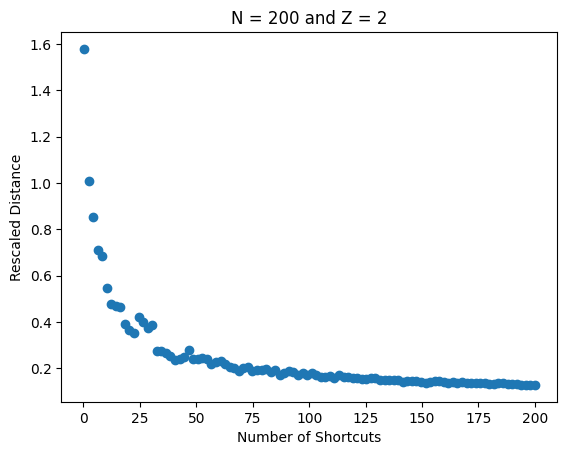

In [36]:
fig,ax = plt.subplots()
ax.scatter(total_num_shortcuts, rescale_distance)
ax.set_ylabel("Rescaled Distance")
ax.set_xlabel("Number of Shortcuts")
ax.set_title("N = 200 and Z = 2")

In [37]:
N = 200
Z = 4
p = np.linspace(0.001, 1, 100)

distance_distribution = []


for s in p:
    G = nx.newman_watts_strogatz_graph(N, Z, s)
    avg_shortest_path = nx.average_shortest_path_length(G)
    distance_distribution.append(avg_shortest_path)

rescale_distance = np.pi * np.array(distance_distribution) * Z / N
total_num_shortcuts = p * N * Z / 2


Text(0.5, 1.0, 'N = 100 and Z = 4')

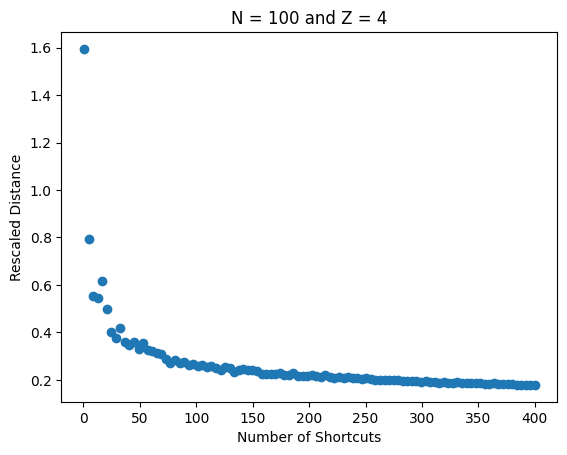

In [38]:
fig,ax = plt.subplots()
ax.scatter(total_num_shortcuts, rescale_distance)
ax.set_ylabel("Rescaled Distance")
ax.set_xlabel("Number of Shortcuts")
ax.set_title("N = 100 and Z = 4")

## Scaling Exponent Fit

In [40]:
from scipy.optimize import curve_fit

def gaussian(p, tau, a, c):
    """
    Returns the value of a Gaussian function at a given point x.

    Parameters:
    x (float): The point at which to evaluate the function.
    amplitude (float): The amplitude of the Gaussian function.
    center (float): The center of the Gaussian function.
    stddev (float): The standard deviation of the Gaussian function.

    Returns:
    float: The value of the Gaussian function at the given point.
    """
    return a * p ** (tau) + c


def gaussian_fit(x_data, y_data): # Define the range of x values to fit the Gaussian to
    # Plot the data
    fig, ax = plt.subplots(figsize=(8,6))
    ax.scatter(x_data, y_data, label="Data",color='red',s=20)
    c_guess = y_data[-1]
    a_guess = 1
    # Use the curve_fit function to fit the Gaussian to the selected data
    popt, pcov = curve_fit(gaussian, x_data, y_data, p0=[-1.0, a_guess, c_guess])
    ## Print the results
    print('$\tau$:' ,popt[0],'with uncertainty =',(pcov[0][0])**(1/2))


    # Plot the fitted Gaussian function
    ax.plot(x_data, gaussian(x_data, *popt), label="Fit",color = 'grey',linewidth = 3)
    # Add labels and a legend to the plot
    ax.set_xlabel("x",fontsize = 17)
    ax.set_ylabel("y",fontsize = 17)
    ax.legend(fontsize = 17)
    ax.tick_params(labelsize=15)
    # # ax.axvline(x = popt[2], linestyle = '--')
    # plt.errorbar(popt[2], popt[1]+popt[0], xerr=pcov[2][2], yerr=pcov[1][1], fmt='o')
    # # Add the coordinate text to the plot
    # plt.annotate('({}KeV, {})'.format(round(popt[2],2), round(popt[1]+popt[0],2)), xy=(popt[2], popt[1]+popt[0]),
    #              xytext=(popt[2] + 20, popt[1]+popt[0] + 100), fontsize=17,
    #              arrowprops=dict(facecolor='black', shrink=0.05))
    # Show the plot
    plt.show()

In [41]:
N = 200
Z = 4
p = np.linspace(0.001, 1, 100)

distance_distribution = []


for s in p:
    G = nx.newman_watts_strogatz_graph(N, Z, s)
    avg_shortest_path = nx.average_shortest_path_length(G)
    distance_distribution.append(avg_shortest_path)

rescale_distance = np.pi * np.array(distance_distribution) * Z / N
total_num_shortcuts = p * N * Z / 2


## Real Network